# Домашнее задание 3. Оценки
Ковалев Даниил, СКБ171

#### Примечание
Дадим определение выборочного среднего и выборочной дисперсии один раз здесь, а также проверим эти оценки на несмещенность, потому что рассуждения и определения верны для любого распределения и не нуждаются в дублировании. При рассмотрении конкретных реализаций выборок позднее будем проверять только состоятельность.

### Выборочное среднее и выборочная дисперсия
Пусть $X_1,\ldots,X_n$ - выборка независимых одинаково распределенных по закону $\xi$ случайных величин, тогда $\hat{\alpha}_1=\dfrac{1}{n}\sum\limits_{i=1}^{n}X_i$ называется выборочным средним, а $\hat{\mu_2}=\dfrac{1}{n}\sum\limits_{i=1}^{n}(X_i-\hat{\alpha}_1)^2$ - выборочной дисперсией.

Проверим данные оценки на несмещенность.

Посчитаем $\mathbb{E}\hat{\alpha}_1$: 

$\mathbb{E}\hat{\alpha}_1=
\mathbb{E}\left[\dfrac{1}{n} \sum\limits_{i=1}^{n}X_i\right] = \dfrac{1}{n} \sum\limits_{i=1}^{n}\mathbb{E} X_i = \dfrac{1}{n} \sum\limits_{i=1}^{n}\mathbb{E}X_1 = \dfrac{1}{n}\cdot n\cdot \mathbb{E} X_1 = \mathbb{E} X_1=\mathbb{E}\xi$

Итак, $\mathbb{E}\hat{\alpha}_1=\mathbb{E}\xi$, т.е. **выборочное среднее является несмещенной оценкой для мат. ожидания $\xi$**

Посчитаем $\mathbb{E}\hat{\mu}_2$. Построим выборку $Y_1,\ldots,Y_n$, где $Y_i=X_i-\mathbb{E}\xi$, $i=\overline{1,n}$.
Имеем:

$\mathbb{E}Y_i=\mathbb{E}\left[X_i-\mathbb{E}\xi\right]=\mathbb{E}X_i-\mathbb{E}\left[\mathbb{E}\xi\right]=\mathbb{E}\xi-\mathbb{E}\xi=0$

$\mathbb{D}Y_i=\mathbb{D}\left[X_i-\mathbb{E}\xi\right]=\mathbb{D}X_i=\mathbb{D}X_1=\mathbb{D}\xi$, т.к. $\mathbb{E}\xi$ - константа

С другой стороны, по определению $\mathbb{D}Y_i=\mathbb{E}\left[Y_i^2\right]-\left[\mathbb{E}Y_i\right]^2=\mathbb{E}\left[Y_i^2\right]$.

Введем обозначения $\overline{X}=\hat{\alpha}_1$, $\overline{Y}=\dfrac{1}{n}\sum\limits_{i=1}^{n}Y_i$. Имеем:

$Y_i-\overline{Y}=X_i-\mathbb{E}\xi-\dfrac{1}{n}\sum\limits_{i=1}^{n}\left(X_i-\mathbb{E}\xi\right)=X_i-\mathbb{E}\xi-\dfrac{1}{n}\sum\limits_{i=1}{n}X_i+\dfrac{1}{n}\sum\limits_{i=1}^{n}\mathbb{E}\xi=X_i-\overline{X}$

$\hat{\mu_2}=
\dfrac{1}{n}\sum\limits_{i=1}^{n}(X_i-\overline{X})^2=
\dfrac{1}{n}\sum\limits_{i=1}^{n}(Y_i-\overline{Y})^2=
\dfrac{1}{n}\left[\sum\limits_{i=1}^{n}Y_i^2-2\sum\limits_{i=1}^{n}Y_i\overline{Y}+\sum\limits_{i=1}^{n}\overline{Y}^2\right]=
\dfrac{1}{n}\sum\limits_{i=1}^{n}Y_i^2-2\overline{Y}\dfrac{1}{n}\sum\limits_{i=1}^{n}Y_i+\dfrac{1}{n}\sum\limits_{i=1}^{n}\overline{Y}^2=
\dfrac{1}{n}\sum\limits_{i=1}^{n}Y_i^2-\overline{Y}^2$

$\mathbb{E}\hat{\mu_2}=
\mathbb{E}\left[\dfrac{1}{n}\sum\limits_{i=1}^{n}Y_i^2-\overline{Y}^2\right]=
\mathbb{E}\left[\mathbb{D}Y_i\right]-\mathbb{E}\left[\overline{Y}^2\right]=
\mathbb{D}\xi-\mathbb{E}\left[\overline{Y}^2\right]$

$X_i,X_j$ являются независимыми случайными величинами при $i\neq j$ (по условию), значит, и смещенные на константу $Y_i,Y_j$ будут являться независимыми. Тогда $\mathbb{E}\left[Y_i Y_j\right]=\mathbb{E}Y_i\cdot\mathbb{E}Y_j=0\cdot 0=0$. Имеем:

$\mathbb{E}\left[\overline{Y}^2\right]=
\dfrac{1}{n^2}\mathbb{E}\left[\left(\sum\limits_{i=1}^n Y_i\right)^2\right]=
\left\{\mathbb{E}\left[Y_i Y_j\right]=0,i\neq j\right\}=
\dfrac{1}{n^2}\sum\limits_{i=1}^n\left[\mathbb{E}\left(Y_i^2\right)\right]=
\dfrac{1}{n^2}\sum\limits_{i=1}^n\mathbb{D} Y_i=
\dfrac{1}{n^2}\sum\limits_{i=1}^n\mathbb{D} \xi=\dfrac{1}{n}\mathbb{D}\xi$

Подставляем полученные результаты:

$\mathbb{E}\hat{\mu_2}=
\mathbb{D}\xi-\mathbb{E}\left[\overline{Y}^2\right]=
\mathbb{D}\xi-\dfrac{1}{n}\mathbb{D}\xi=\dfrac{n-1}{n}\mathbb{D}\xi$

Итак, $\mathbb{E}\hat{\mu_2}=\dfrac{n-1}{n}\mathbb{D}\xi$, т.е. **выборочная дисперсия является смещенной оценкой для дисперсии $\xi$**

In [1]:
import os
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
from scipy import special, stats, optimize
from scipy.stats import pearsonr, mstats
from bisect import bisect_left, bisect_right
import functools
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 16})
sample_count = [5, 10, 100, 10**3, 10**5]

In [3]:
def build_edf(emperical_data, return_y=False):
    length = len(emperical_data)
    if length == 0:
        raise ValueError("Emperical data must have length 1 or more")
    y_values = []
    prev = None
    counter, total = 0, 0
    for entry in emperical_data:
        if prev is None:
            prev = entry
        if entry == prev:
            counter += 1
        else:
            y_values += counter * [total / length]
            prev = entry
            counter = 1
        total += 1
    y_values += counter * [total / length]
    
    if return_y:
        return y_values

    def edf(x, emperical_data=emperical_data, y_values=y_values):
        if x < emperical_data[0]:
            return 0.0
        return y_values[bisect_right(emperical_data, x) - 1]
    
    return edf

Функция для генерации выборок

In [4]:
def generate_samples(function, **kwargs):
    ret = {}
    for size in sample_count:
        ret[size] = [function(size=size, **kwargs) for i in range(5)]
    return ret

## Распределение Ципфа (дискретное)

In [5]:
# функция вероятности
def zipf_pmf(x, s, N): return (1 / x**s) / np.sum(1 / np.arange(1, N+1)**s)
# функция распределения
def zipf_cdf(x, s, N):
    if isinstance(x, int) or isinstance(x, float):
        return np.sum(zipf_pmf(np.arange(1, np.floor(x)+1), s, N))
    ret = np.zeros(x.shape)
    for i in range(x.shape[0]):
        ret[i] = np.sum(zipf_pmf(np.arange(1, np.floor(x[i])+1), s, N))
    return ret

In [6]:
def zipf_random(s, N, size=1):
    uni_random = stats.uniform.rvs(size=size, )
    ticks = [0]
    ret = []
    for elem in uni_random:
        if elem <= ticks[-1]:
            ret.append(bisect_left(ticks, elem))
        else:
            cur = len(ticks)
            while ticks[-1] < elem:
                ticks.append(ticks[-1] + zipf_pmf(cur, s, N))
                cur += 1
            ret.append(cur - 1)
    return ret

Выберем для моделирования параметры $s=1.5$ и $N=10$

In [7]:
zipf_s = 1.5
zipf_N = 15
zipf_samples = generate_samples(zipf_random, s=zipf_s, N=zipf_N)

### 3.1 Нахождение выборочного среднего и выборочной дисперсии

#### Выборочное среднее

In [8]:
zipf_sample_mean = dict([(cnt, [np.mean(samples) for samples in samples_list]) for cnt, samples_list in zipf_samples.items()])
for cnt, sample_mean in zipf_sample_mean.items():
    print("{:50}".format("Выборочное среднее для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(value) for value in sample_mean])

Выборочное среднее для выборок объемом 5:          4.200  2.000  2.400  2.400  2.200
Выборочное среднее для выборок объемом 10:         1.800  2.700  2.800  3.900  3.400
Выборочное среднее для выборок объемом 100:        2.750  3.310  3.340  2.700  2.960
Выборочное среднее для выборок объемом 1000:       3.044  2.894  3.028  2.975  3.011
Выборочное среднее для выборок объемом 100000:     3.042  3.050  3.037  3.041  3.050


#### Истинное значение
Из домашней работы 1:

$\mathbb{E}\xi=
\dfrac{\sum\limits_{k=1}^{N}k^{1-s}}{\sum\limits_{n=1}^{N}n^{-s}}=
\dfrac{\sum\limits_{k=1}^{15}k^{-0.5}}{\sum\limits_{n=1}^{15}n^{-1.5}}$

In [9]:
def zipf_expected(s, N):
    return np.sum(np.arange(1, N+1)**(1-s)) / np.sum(np.arange(1, N+1) ** (-s))
zipf_theoretical_expected = zipf_expected(zipf_s, zipf_N)
zipf_theoretical_expected

3.0478379162273366

Итак, $\mathbb{E}\xi\approx 3.048$. Согласно результатам вычислений, с увеличением объема выборки выборочное среднее приближается к истинному значению мат. ожидания, значит, данная оценка является состоятельной

#### Выборочная дисперсия

In [10]:
zipf_sample_variance = dict([(cnt, [np.var(samples) for samples in samples_list]) for cnt, samples_list in zipf_samples.items()])
for cnt, samples_variance in zipf_sample_variance.items():
    print("{:50}".format("Выборочная дисперсия для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(value) for value in samples_variance])

Выборочная дисперсия для выборок объемом 5:       20.160  0.800  7.840  5.440  3.760
Выборочная дисперсия для выборок объемом 10:       1.960  5.610 10.760 10.490 12.240
Выборочная дисперсия для выборок объемом 100:      9.807 11.314 11.984  5.750  7.418
Выборочная дисперсия для выборок объемом 1000:     9.838  8.753  9.531  9.958  9.507
Выборочная дисперсия для выборок объемом 100000:   9.915  9.945  9.891  9.882  9.917


#### Истинное значение
Из домашней работы 1:

$\mathbb{D}\xi=
\dfrac{\sum\limits_{k=1}^{N}k^{2-s}}{\sum\limits_{n=1}^{N}n^{-s}}-\left[\dfrac{\sum\limits_{k=1}^{N}k^{1-s}}{\sum\limits_{n=1}^{N}n^{-s}}\right]^2=
\dfrac{\sum\limits_{k=1}^{15}k^{0.5}}{\sum\limits_{n=1}^{15}n^{-1.5}}-\left[\dfrac{\sum\limits_{k=1}^{15}k^{-0.5}}{\sum\limits_{n=1}^{15}n^{-1.5}}\right]^2$

In [11]:
def zipf_variance(s, N):
    return np.sum(np.arange(1, N + 1) ** (2 - s)) / np.sum(np.arange(1, N + 1) ** (-s)) - zipf_theoretical_expected ** 2
zipf_theoretical_variance = zipf_variance(zipf_s, zipf_N)
zipf_theoretical_variance

9.941063756209688

Итак, $\mathbb{D}\xi\approx 9.941$. Согласно результатам вычислений, с увеличением объема выборки выборочная дисперсия приближается к истинному значению дисперсии, значит, данная оценка является состоятельной

### 3.2 Нахождение параметров распределений событий

Зафиксируем параметр $N$ и будем оценивать параметр $s$. Параметр $N$, как правило, известен, поэтому поиск оценки для него ценности не представляет

#### Метод моментов
Обозначим выборочное среднее за $\overline{X}$, тогда:

$\mathbb{E}\xi=\dfrac{\sum\limits_{k=1}^{N}k^{1-s}}{\sum\limits_{n=1}^{N}n^{-s}}=\overline{X}$.

Решить полученное уравнение относительно $s$ аналитически не представляется возможным (так, в статье на эту тему нет информации о подобных способах [1]), поэтому придется решать аналитически. С увеличением $s$ мат. ожидание убывает, поэтому можно использовать бинарный поиск.

In [12]:
for cnt, sample_mean in zipf_sample_mean.items():
    print("{:50}".format("Оценка параметра s для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(optimize.bisect(lambda s: zipf_expected(s, zipf_N) - value, 0, 5)) for value in sample_mean])

Оценка параметра s для выборок объемом 5:          1.097  2.074  1.810  1.810  1.932
Оценка параметра s для выборок объемом 10:         2.248  1.654  1.607  1.191  1.363
Оценка параметра s для выборок объемом 100:        1.630  1.397  1.386  1.654  1.537
Оценка параметра s для выборок объемом 1000:       1.502  1.565  1.508  1.530  1.515
Оценка параметра s для выборок объемом 100000:     1.503  1.499  1.505  1.503  1.499


С увеличением объема выборки оценка параметра $s$, полученная методом моментов, приближается к истинному значению параметра $1.5$, значит, данная оценка является состоятельной. Проверить другие свойства (несмещенность, эффективность, оптимальность) не представляется возможным, т.к. нет аналитического решения.

#### Метод максимального правдоподобия

Пусть выборка имеет объем $M$, тогда:

$L_s(X)=\prod\limits_{i=1}^{M}\dfrac{X_i^{-s}}{\sum\limits_{k=1}^{N}k^{-s}}$

Логарифм не меняет характер монотонности:

$\ln{L_s(X)}=
\sum\limits_{i=1}^{M}\ln{\dfrac{X_i^{-s}}{\sum\limits_{k=1}^{N}k^{-s}}}=
\sum\limits_{i=1}^{M}\left[-s\ln{x_i}-\ln{\sum\limits_{k=1}^{N}k^{-s}}\right]$

Равенство производной нулю есть необходимое условие максимума:

$\left(\ln{L_s(X)}\right)'=
\sum\limits_{i=1}^{M}\left[\dfrac{\sum\limits_{k=1}^{N}k^{-s}\ln{k}}{\sum\limits_{k=1}^{N}k^{-s}}-\ln{x_i}\right]=0$

Из-за невозможности преобразования сумм найти оценку аналитически нельзя.

In [13]:
# вклад выборки
def zipf_score(s, N, sample):
    ticks = np.arange(1, N+1)
    powered = ticks**(-s)
    return np.sum(np.sum(powered * np.log(ticks)) / np.sum(powered) - np.log(sample))

In [14]:
for cnt, sample_list in zipf_samples.items():
    print("{:50}".format("Оценка параметра s для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(optimize.bisect(lambda s: zipf_score(s, zipf_N, sample), 0, 5)) for sample in sample_list])

Оценка параметра s для выборок объемом 5:          1.193  1.732  2.056  1.823  1.882
Оценка параметра s для выборок объемом 10:         2.172  1.590  1.703  1.136  1.347
Оценка параметра s для выборок объемом 100:        1.670  1.408  1.456  1.536  1.472
Оценка параметра s для выборок объемом 1000:       1.498  1.559  1.494  1.547  1.503
Оценка параметра s для выборок объемом 100000:     1.503  1.500  1.504  1.502  1.498


С увеличением объема выборки оценка параметра $s$, полученная методом максимального правдоподобия, приближается к истинному значению параметра $1.5$, значит, данная оценка является состоятельной. Проверить другие свойства (несмещенность, эффективность, оптимальность) не представляется возможным, т.к. нет аналитического решения.

### 3.3 Работа с данными

В домашней работе 1 в качестве интерпретации была выбрана частота слов с тем или иным рангом в романе "Война и мир" (на английском языке).

In [15]:
with open('warandpeace.txt', 'r') as book:
    data = book.read()
words = data.lower().split()
word_counts = dict()
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1
word_counts = np.array(list(word_counts.values()))
# freqs[i] - количество слов с рангом (i + 1)
freqs = np.array([0] * max(word_counts))
for word_count in word_counts:
    freqs[word_count - 1] += 1
freqs = freqs / np.sum(freqs)

Значение выборочного среднего:

In [16]:
word_counts_mean = np.mean(word_counts)
word_counts_mean

12.964005394768844

Значение выборочной дисперсии:

In [17]:
word_counts_var = np.var(word_counts)
word_counts_var

65884.45889585848

Оценка параметра $s$, найденная методом моментов:

In [18]:
zipf_s_moments = optimize.bisect(lambda s: zipf_expected(s, len(freqs)) - word_counts_mean, 0, 5)
zipf_s_moments

1.866980067560462

Оценка параметра $s$, найденная методом максимального правдоподобия:

In [19]:
zipf_s_likelihood = optimize.bisect(lambda s: zipf_score(s, len(freqs), word_counts), 0, 5)
zipf_s_likelihood

1.8088726311555092

Сравним на графике эмпирические (полученные по данным из книги) и теоретические (построенные с параметром $s$ равным оценкам, найденным двумя методами) вероятности.

In [20]:
def zipf_plot(end=None, log_ax=True):
    _, ax = plt.subplots(figsize=(10, 7))
    if log_ax:
        ax.set_xscale("log")
    y_freqs = (freqs if end is None else freqs[:end])
    ax.set_xlim(0.9, len(y_freqs) + 0.1)
    x_values = np.arange(1, len(y_freqs) + 1)
    plt.scatter(x_values, y_freqs, linewidth=3, color='r', alpha=1, label="Эмпирические вероятности (по книге)")
    plt.scatter(x_values, zipf_pmf(x_values, zipf_s_moments, len(freqs)), linewidth=2, color='g', alpha=0.9, label="Вероятности с s_моментов")
    plt.scatter(x_values, zipf_pmf(x_values, zipf_s_likelihood, len(freqs)), linewidth=1, color='b', alpha=0.6, label="Вероятности с s_макс.правдоподобия")
    plt.legend()
    plt.show()

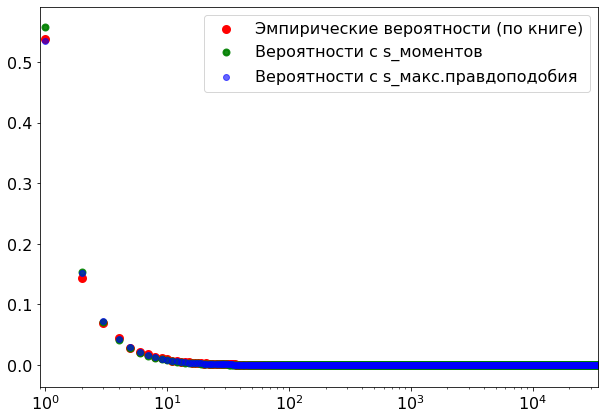

In [21]:
zipf_plot()

Для наглядности представим на отдельном графике вероятности для первых десяти точек

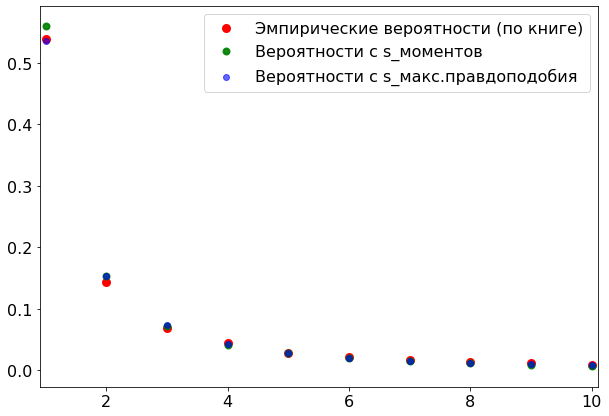

In [22]:
zipf_plot(end=10, log_ax=False)

Видно, что теоретические значения вероятностей, посчитанные с использованием оценок, полученных обоими методами, близки к эмпирическим.

## Бета-распределение (абсолютно непрерывное)

In [23]:
# плотность вероятности
def beta_pdf(x, alpha, beta): return stats.beta.pdf(x, alpha, beta)
# функция распределения
def beta_cdf(x, alpha, beta): return special.betainc(alpha, beta, x)

In [24]:
def beta_random(a, b, size=1):
    ret = []
    l = a
    k = a + b - 1
    for _ in range(size):
        uni_set = stats.uniform.rvs(size=k)
        uni_set.sort()
        ret.append(uni_set[l-1])
    return np.array(ret)

Выберем для моделирования параметры $a=5$ и $b=2$

In [25]:
beta_a = 5
beta_b = 2
beta_samples = generate_samples(beta_random, a=beta_a, b=beta_b)

### 3.1 Нахождение выборочного среднего и выборочной дисперсии

#### Выборочное среднее

In [26]:
beta_sample_mean = dict([(cnt, [np.mean(samples) for samples in samples_list]) for cnt, samples_list in beta_samples.items()])
for cnt, sample_mean in beta_sample_mean.items():
    print("{:50}".format("Выборочное среднее для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(value) for value in sample_mean])

Выборочное среднее для выборок объемом 5:          0.708  0.722  0.781  0.615  0.704
Выборочное среднее для выборок объемом 10:         0.730  0.722  0.691  0.711  0.764
Выборочное среднее для выборок объемом 100:        0.714  0.718  0.702  0.697  0.707
Выборочное среднее для выборок объемом 1000:       0.716  0.717  0.708  0.720  0.714
Выборочное среднее для выборок объемом 100000:     0.714  0.714  0.714  0.714  0.714


#### Истинное значение
Из домашней работы 1:

$\mathbb{E}\xi=\dfrac{\alpha}{\alpha+\beta}$

In [27]:
def beta_expected(a, b): return a / (a + b)
beta_theoretical_expected = beta_expected(beta_a, beta_b)
beta_theoretical_expected

0.7142857142857143

Итак, $\mathbb{E}\xi\approx 0.714$. Согласно результатам вычислений, с увеличением объема выборки выборочное среднее приближается к истинному значению мат. ожидания, значит, данная оценка является состоятельной

#### Выборочная дисперсия

In [28]:
beta_sample_variance = dict([(cnt, [np.var(samples) for samples in samples_list]) for cnt, samples_list in beta_samples.items()])
for cnt, samples_variance in beta_sample_variance.items():
    print("{:50}".format("Выборочная дисперсия для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:7.4f}".format(value) for value in samples_variance])

Выборочная дисперсия для выборок объемом 5:        0.0219  0.0569  0.0057  0.0582  0.0203
Выборочная дисперсия для выборок объемом 10:       0.0311  0.0183  0.0113  0.0112  0.0235
Выборочная дисперсия для выборок объемом 100:      0.0240  0.0225  0.0274  0.0254  0.0232
Выборочная дисперсия для выборок объемом 1000:     0.0255  0.0241  0.0268  0.0244  0.0271
Выборочная дисперсия для выборок объемом 100000:   0.0255  0.0256  0.0256  0.0257  0.0255


#### Истинное значение
Из домашней работы 1:

$\mathbb{D}\xi=\dfrac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

In [29]:
def beta_variance(a, b): return (a * b) / ((a + b)**2 * (a + b + 1))
beta_theoretical_variance = beta_variance(beta_a, beta_b)
beta_theoretical_variance

0.025510204081632654

Итак, $\mathbb{D}\xi\approx 0.0255$. Согласно результатам вычислений, с увеличением объема выборки выборочная дисперсия приближается к истинному значению дисперсии, значит, данная оценка является состоятельной

### 3.2 Нахождение параметров распределений событий

#### Метод моментов
Зафиксируем параметр $\alpha$ и будем оценивать параметр $\beta$. Обозначим выборочное среднее за $\overline{X}$, тогда:

$\mathbb{E}\xi=\dfrac{\alpha}{\alpha+\beta}=\overline{X}$.

$\hat{\beta}=\dfrac{\alpha\left(1-\overline{X}\right)}{\overline{X}}$

In [30]:
for cnt, sample_mean in beta_sample_mean.items():
    print("{:50}".format("Оценка параметра beta для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(beta_a * (1 - value) / value) for value in sample_mean])

Оценка параметра beta для выборок объемом 5:       2.066  1.929  1.401  3.136  2.102
Оценка параметра beta для выборок объемом 10:      1.849  1.927  2.241  2.036  1.544
Оценка параметра beta для выборок объемом 100:     2.003  1.964  2.127  2.169  2.077
Оценка параметра beta для выборок объемом 1000:    1.986  1.971  2.059  1.943  2.000
Оценка параметра beta для выборок объемом 100000:  2.003  2.004  2.002  1.999  2.004


С увеличением объема выборки оценка параметра $\beta$, полученная методом моментов, приближается к истинному значению параметра $2$, значит, данная оценка является состоятельной. 

Проверим несмещенность этой оценки:

$\mathbb{E}\hat\beta=\alpha\mathbb{E}\left[\dfrac{1-\overline{X}}{\overline{X}}\right]=\alpha\mathbb{E}\left[\dfrac{1-\dfrac{1}{n}\eta}{\dfrac{1}{n}\eta}\right]$

Здесь $\eta$ - случайная величина, распределенная как сумма $n$ случайных величин, имеющих бета-распределение ($n$ - объем выборки). Согласно [2], найти это распределение можно только численно, поэтому аналитически проверить несмещенность не получится. Аналогично, не представляется возможным проверка эффективности и оптимальности.

Фиксация одного из параметров не помогла проверить свойства оценки, поэтому найдем методом моментов оценки обоих параметров (в бета-распределении обычно неизвестны оба). Пусть $\overline{V}$ - выборочная дисперсия, тогда:

$\begin{cases}
\overline{X}=\dfrac{\alpha}{\alpha+\beta}\\
\overline{V}=\dfrac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
\end{cases}\Leftrightarrow
\begin{cases}
\beta=\dfrac{\alpha\left(1-\overline{X}\right)}{\overline{X}}\\
\overline{V}=\dfrac{\alpha^2\left(1-\overline{X}\right)}{\overline{X}\left(\alpha+\dfrac{\alpha\left(1-\overline{X}\right)}{\overline{X}}\right)^2\left(\alpha+\dfrac{\alpha\left(1-\overline{X}\right)}{\overline{X}}+1\right)}
\end{cases}$

Рассмотримотдельно второе уравнение:

$\alpha^2\left(1-\overline{X}\right)=\overline{V}\cdot\dfrac{\alpha^2\overline{X}^2+2\alpha^2\overline{X}\left(1-\overline{X}\right)+\alpha^2\left(1-\overline{X}\right)^2}{\overline{X}^2}\cdot\dfrac{\alpha\overline{X}+\alpha\left(1-\overline{X}\right)+\overline{X}}{\overline{X}}$

$\alpha^2\left(1-\overline{X}\right)=\overline{V}\cdot\dfrac{\alpha^2}{\overline{X}^2}\left(\alpha+\overline{X}\right)$

$\hat{\alpha}=\overline{X}\left[\dfrac{\overline{X}\left(1-\overline{X}\right)}{\overline{V}}-1\right]$

Подставляя в первое уравнение, получаем:

$\hat{\beta}=\left(1-\overline{X}\right)\left[\dfrac{\overline{X}\left(1-\overline{X}\right)}{\overline{V}}-1\right]$

In [31]:
for cnt, sample_mean in beta_sample_mean.items():
    def alpha_est(mean, var): return mean * (mean * (1 - mean) / var - 1)
    def beta_est(mean, var): return (1 - mean) * (mean * (1 - mean) / var - 1)
    print("{:55}".format("Оценка параметра alpha для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(alpha_est(mean_value, var_value)) for mean_value, var_value in zip(sample_mean, beta_sample_variance[cnt])])
    print("{:55}".format("Оценка параметра beta для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(beta_est(mean_value, var_value)) for mean_value, var_value in zip(sample_mean, beta_sample_variance[cnt])])

Оценка параметра alpha для выборок объемом 5:           5.964  1.825 22.755  1.888  6.527
Оценка параметра beta для выборок объемом 5:            2.464  0.704  6.374  1.184  2.744
Оценка параметра alpha для выборок объемом 10:          3.890  7.192 12.325 12.311  5.088
Оценка параметра beta для выборок объемом 10:           1.439  2.771  5.524  5.014  1.571
Оценка параметра alpha для выборок объемом 100:         5.363  5.755  4.658  5.107  5.610
Оценка параметра beta для выборок объемом 100:          2.148  2.261  1.981  2.216  2.330
Оценка параметра alpha для выборок объемом 1000:        5.006  5.329  4.742  5.230  4.665
Оценка параметра beta для выборок объемом 1000:         1.988  2.101  1.953  2.032  1.867
Оценка параметра alpha для выборок объемом 100000:      5.005  4.977  4.980  4.959  5.000
Оценка параметра beta для выборок объемом 100000:       2.005  1.995  1.994  1.983  2.004


С увеличением объема выборки оценки параметров $\alpha$ и $\beta$, полученные методом моментов, приближаются к истинному значению параметров $5$ и $2$, значит, данные оценки являются состоятельными.

#### Метод максимального правдоподобия

Искать оценки будем для обоих параметров, т.к. принятие одного параметра за известный не упростит решение: вместо системы нерешаемых аналитически уравнений будет получено одно нерешаемое аналитически уравнение (об этом см. [3]). Пусть выборка имеет объем $n$, тогда:

$L_{\alpha,\beta}(X)=
\prod\limits_{i=1}^{n}\dfrac{X_i^{\alpha-1}(1-X_i)^{\beta-1}}{B(\alpha,\beta)}=
B^{-n}(\alpha,\beta)\prod\limits_{i=1}^{n}X_i^{\alpha-1}(1-X_i)^{\beta-1}$

Логарифм не меняет характер монотонности:

$\ln{L_{\alpha,\beta}(X)}=
-n\ln{B(\alpha,\beta)}+(\alpha-1)\sum\limits_{i=1}^{n}\ln{X_i}+(\beta-1)\sum\limits_{i=1}^{n}\ln{(1-X_i)}=
-n\left(\ln{\Gamma{(\alpha)}}+\ln{\Gamma{(\beta)}}-\ln{\Gamma{(\alpha+\beta)}}\right)+(\alpha-1)\sum\limits_{i=1}^{n}\ln{X_i}+(\beta-1)\sum\limits_{i=1}^{n}\ln{(1-X_i)}$

Равенство частных производных нулю есть необходимое условие максимума:

$\begin{cases}
\dfrac{\partial\ln{L_{\alpha,\beta}(X)}}{\partial\alpha}=-n\left(\dfrac{\ln{\partial\Gamma{(\alpha)}}}{\partial\alpha}-\dfrac{\partial\ln{\Gamma{(\alpha+\beta)}}}{\partial\alpha}\right)+\sum\limits_{i=1}^{n}\ln{X_i}\\
\dfrac{\partial\ln{L_{\alpha,\beta}(X)}}{\partial\beta}=-n\left(\dfrac{\ln{\partial\Gamma{(\beta)}}}{\partial\beta}-\dfrac{\partial\ln{\Gamma{(\alpha+\beta)}}}{\partial\beta}\right)+\sum\limits_{i=1}^{n}\ln{\left(1-X_i\right)}
\end{cases}$

В источниках $\dfrac{\partial\ln{\Gamma{(x)}}}{\partial x}$ обозначают $\psi(x)$ и называют digamma-function. Применим это обозначение к нашей записи системы:

$\begin{cases}
\dfrac{\partial\ln{L_{\alpha,\beta}(X)}}{\partial\alpha}=-n\left(\psi(\alpha)-\psi{(\alpha+\beta)}\right)+\sum\limits_{i=1}^{n}\ln{X_i}\\
\dfrac{\partial\ln{L_{\alpha,\beta}(X)}}{\partial\beta}=-n\left(\psi(\beta)-\psi{(\alpha+\beta)}\right)+\sum\limits_{i=1}^{n}\ln{\left(1-X_i\right)}
\end{cases}$

Полученную систему решаем численно

In [32]:
# вклад выборки
def beta_score(params, sample):
    a, b = params[0], params[1]
    n = len(sample)
    first = n * (special.psi(a+b)-special.psi(a)) + np.sum(np.log(sample))
    second = n * (special.psi(a+b)-special.psi(b)) + np.sum(np.log(1 - sample))
    return (first, second)

# явно посчитанные частные производные 1 и 2 порядка
# (для более хорошей работы метода Ньютона)
def beta_score_fprime(params, n):
    a, b = params[0], params[1]
    first = n * (special.polygamma(1, a+b)-special.polygamma(1, a))
    second = n * (special.polygamma(1, a+b)-special.polygamma(1, b))
    return (first, second)

def beta_score_fprime2(params, n):
    a, b = params[0], params[1]
    first = n * (special.polygamma(2, a+b)-special.polygamma(2, a))
    second = n * (special.polygamma(2, a+b)-special.polygamma(2, b))
    return (first, second)

In [33]:
# в качестве начальных приближений берем 4 и 1
for cnt, sample_list in beta_samples.items():
    estimators = [optimize.newton(lambda params: beta_score(params, sample), (4.3, 2.7), fprime=lambda params: beta_score_fprime(params, len(sample)),
                                  fprime2=lambda params: beta_score_fprime2(params, len(sample)), maxiter=1000) for sample in sample_list]
    print("{:55}".format("Оценка параметра alpha для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(estimator[0]) for estimator in estimators])
    print("{:55}".format("Оценка параметра beta для выборок объемом {}: ".format(cnt)), end="")
    print(*["{:6.3f}".format(estimator[1]) for estimator in estimators])

Оценка параметра alpha для выборок объемом 5:           6.532  2.621 22.759  2.155  6.399
Оценка параметра beta для выборок объемом 5:            2.698  1.101  6.373  1.304  2.657
Оценка параметра alpha для выборок объемом 10:          4.832  8.244 12.995 13.298  6.128
Оценка параметра beta для выборок объемом 10:           1.863  3.234  5.837  5.439  1.950
Оценка параметра alpha для выборок объемом 100:         5.450  5.475  4.428  5.162  5.439
Оценка параметра beta для выборок объемом 100:          2.175  2.132  1.861  2.261  2.245
Оценка параметра alpha для выборок объемом 1000:        5.048  5.461  4.737  5.032  4.774
Оценка параметра beta для выборок объемом 1000:         2.007  2.160  1.951  1.947  1.914
Оценка параметра alpha для выборок объемом 100000:      5.001  4.983  4.975  4.964  5.005
Оценка параметра beta для выборок объемом 100000:       2.004  1.997  1.991  1.985  2.006


С увеличением объема выборки оценки параметров $\alpha$ и $\beta$, полученные методом максимального правдоподобия, приближаются к истинному значению параметров $5$ и $2$, значит, данные оценки являются состоятельными. Проверить другие свойства (несмещенность, эффективность, оптимальность) не представляется возможным, т.к. нет аналитического решения.

### 3.3 Работа с данными

В домашней работе 1 в качестве интерпретации было выбрано распределение эксцентриситетов орбит астероидов и малых тел, изучаемых Lowell Observatory. Загружаем данные:

In [34]:
ECCENTRICITY_INFO_CVS_PATH = 'eccentricity.csv'

In [35]:
def load_info(source_file, eccentricity_info=None):
    def append_to(where, values):
        where.loc[len(where)] = values
    with open(source_file, 'r') as f:
        for line in tqdm.tqdm_notebook(f):
            name = line[7:26].strip()
            if eccentricity_info is not None:
                eccentricity = line[159:169].strip()
                if eccentricity != '':
                    append_to(eccentricity_info, [name, float(eccentricity)])

In [36]:
need_eccentricity = not os.path.isfile(ECCENTRICITY_INFO_CVS_PATH)
eccentricity_info = None
if need_eccentricity:
    eccentricity_info = pd.DataFrame(columns=['Name', 'Eccentricity'])
    load_info(source_file='astorb.dat', diameter_info=diameter_info, eccentricity_info=eccentricity_info)
    with open(ECCENTRICITY_INFO_CVS_PATH, 'w') as out:
        eccentricity_info.to_csv(out, index=False)

In [37]:
e_info = pd.read_csv(ECCENTRICITY_INFO_CVS_PATH)
e_values = np.sort(e_info["Eccentricity"])

In [38]:
e_values.shape

(796787,)

Значение выборочного среднего:

In [39]:
e_mean = np.mean(e_values)
e_mean

0.15663200943171132

Значение выборочной дисперсии:

In [40]:
e_var = np.var(e_values)
e_var

0.008966689196894131

Оценки параметров $\alpha$ и $\beta$, найденные методом моментов:

In [41]:
beta_a_moments = e_mean * (e_mean * (1 - e_mean) / e_var - 1)
beta_b_moments = (1 - e_mean) * (e_mean * (1 - e_mean) / e_var - 1)
print("alpha: {}".format(beta_a_moments))
print("beta: {}".format(beta_b_moments))

alpha: 2.150890978287494
beta: 11.58123814456107


Оценки параметров $\alpha$ и $\beta$, найденные методом максимального правдоподобия:

In [42]:
beta_likelihood = optimize.newton(lambda params: beta_score(params, e_values), (2, 11), fprime=lambda params: beta_score_fprime(params, len(e_values)),
                                  fprime2=lambda params: beta_score_fprime2(params, len(e_values)), maxiter=1000)
print("alpha: {}".format(beta_likelihood[0]))
print("beta: {}".format(beta_likelihood[1]))

alpha: 2.3592788500498507
beta: 12.555165724785503


Сравним на графике ЭФР и две ТФР (построенные с использованием оценок максимального правдоподобия и оценок, полученных методом моментов)

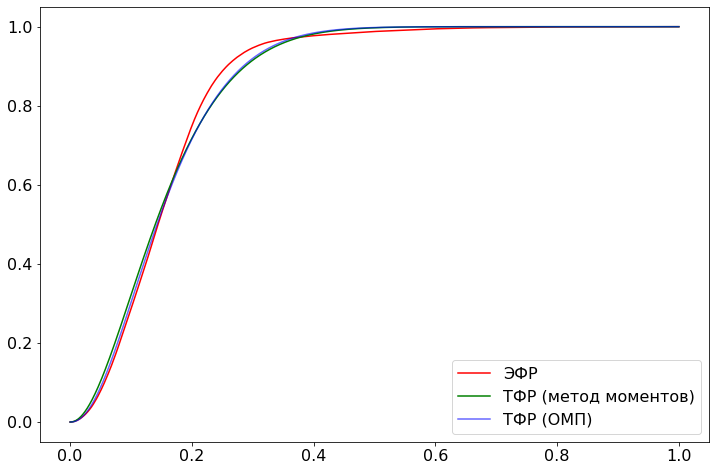

In [43]:
x_values = np.linspace(0, 1, 1000)
beta_edf = build_edf(e_values)
plt.figure(figsize=(12, 8))
plt.plot(x_values, [beta_edf(point) for point in x_values], color='r', label="ЭФР")
plt.plot(x_values, beta_cdf(x_values, beta_a_moments, beta_b_moments), color='g', label="ТФР (метод моментов)")
plt.plot(x_values, beta_cdf(x_values, beta_likelihood[0], beta_likelihood[1]), color='b', alpha=0.6, label="ТФР (ОМП)")
plt.legend()
plt.show()

Видно, что графики ТФР, построенные с использованием оценок, полученных обоими методами, близки к графику ЭФР.

## Источники

[1] Rui Li. A New Parameter Estimation Method for a Zipf-like Distribution for Geospatial Data Access. URL: https://www.researchgate.net/publication/264191587_A_New_Parameter_Estimation_Method_for_a_Zipf-like_Distribution_for_Geospatial_Data_Access

[2] Олейникова С.А. — Аппроксимация закона распределения суммы случайных величин, распределенных по закону бета // Кибернетика и программирование. – 2015. – № 6. – С. 35 - 54. DOI: 10.7256/2306-4196.2015.6.17225 URL: https://nbpublish.com/library_read_article.php?id=17225

[3] Claire Elayne Bangerter Owen. Parameter Estimation for the Beta Distribution. URL: https://scholarsarchive.byu.edu/cgi/viewcontent.cgi?article=2613&context=etd